<a href="https://colab.research.google.com/github/SarahSouzaPontes/pinguins-analisedescritiva/blob/main/pinguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Título: Explorando a Vida dos Pinguins nas Ilhas Antárticas

Introdução:
Nesta história, vamos mergulhar no fascinante mundo dos pinguins nas ilhas antárticas, explorando uma coleção de dados que nos revela informações sobre suas diferentes espécies, características físicas, locais de observação e outras informações interessantes.

Capítulo 1: Variedade de Espécies
O nosso primeiro ponto de partida é a diversidade das espécies de pinguins. Descobrimos três espécies únicas: Adélia, Pintado e Papúa. Cada uma delas tem suas próprias características distintas e comportamentos peculiares.

Capítulo 2: Habitat nas Ilhas
As ilhas antárticas servem como o habitat para esses adoráveis habitantes. Entre as ilhas de Torgersen, Biscoe e Dream, eles têm suas casas, e podemos explorar como suas preferências de habitat variam e o que os leva a escolher uma ilha sobre outra.

Capítulo 3: A Anatomia dos Pinguins
A anatomia dos pinguins também é intrigante. Observamos como o comprimento e a profundidade do bico, bem como o comprimento da nadadeira, variam entre as diferentes espécies. Essas características podem desempenhar um papel crucial em sua sobrevivência e adaptação ao ambiente.

Capítulo 4: Massa Corporal e Adaptação
A massa corporal dos pinguins, medida em gramas, revela informações sobre seu estado físico e saúde. Diferentes espécies podem ter diferentes massas corporais, o que pode indicar como elas se adaptam às condições climáticas rigorosas da Antártica.

Capítulo 5: Identidade de Gênero e Ano de Observação
Além das características físicas, também exploramos o sexo dos pinguins (macho ou fêmea) e o ano em que foram observados. Isso nos ajuda a entender melhor seus padrões de comportamento e como eles evoluíram ao longo do tempo.

Conclusão:
Ao mergulhar nas variáveis que compõem a vida dos pinguins nas ilhas antárticas, desvendamos um mundo rico em diversidade e adaptação. Cada espécie tem sua própria história para contar, e por meio desses dados, conseguimos vislumbrar um pouco de sua jornada emocionante e única.

In [2]:
import pandas as pd

# Caminho para o arquivo CSV
file_path = '/content/penguins (1).csv'

# Lendo o arquivo CSV em um DataFrame do Pandas
df = pd.read_csv(file_path)

# Mostrando as primeiras linhas do DataFrame
print(df.head())


   Unnamed: 0 species     island  bill_length_mm  bill_depth_mm  \
0           1  Adelie  Torgersen            39.1           18.7   
1           2  Adelie  Torgersen            39.5           17.4   
2           3  Adelie  Torgersen            40.3           18.0   
3           4  Adelie  Torgersen             NaN            NaN   
4           5  Adelie  Torgersen            36.7           19.3   

   flipper_length_mm  body_mass_g     sex  year  
0              181.0       3750.0    male  2007  
1              186.0       3800.0  female  2007  
2              195.0       3250.0  female  2007  
3                NaN          NaN     NaN  2007  
4              193.0       3450.0  female  2007  


In [3]:
# Obtendo os nomes das colunas
colunas = df.columns

# Mostrando os nomes das colunas
print(colunas)

Index(['Unnamed: 0', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')


In [6]:
data_dictionary = {
    'species': "Espécie do pinguim (Adélia, Pintado, Papúa)",
    'island': "Ilha onde o pinguim foi observado (Torgersen, Biscoe, Dream)",
    'bill_length_mm': "Comprimento do bico em milímetros",
    'bill_depth_mm': "Profundidade do bico em milímetros",
    'flipper_length_mm': "Comprimento da nadadeira em milímetros",
    'body_mass_g': "Massa corporal do pinguim em gramas",
    'sex': "Sexo do pinguim (Male, Female)",
    'year': "Ano da observação"}

#Dicionário de dados




In [7]:
print(data_dictionary['species'])


Espécie do pinguim (Adélia, Pintado, Papúa)


In [25]:
# Balancear as amostras das espécies
balanced_df = pd.DataFrame()
for species in df['species'].unique():
    species_df = df[df['species'] == species]
    species_sampled = resample(species_df, replace=True, n_samples=len(df['species']), random_state=42)
    balanced_df = pd.concat([balanced_df, species_sampled])

# Verificar o balanceamento das amostras - dados balanceados
print(balanced_df['species'].value_counts())

# Agora você pode usar o balanced_df para análises e modelagem


Adelie       344
Gentoo       344
Chinstrap    344
Name: species, dtype: int64


In [27]:
# Verificar o balanceamento das amostras - dados originais
print(df['species'].value_counts())

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64


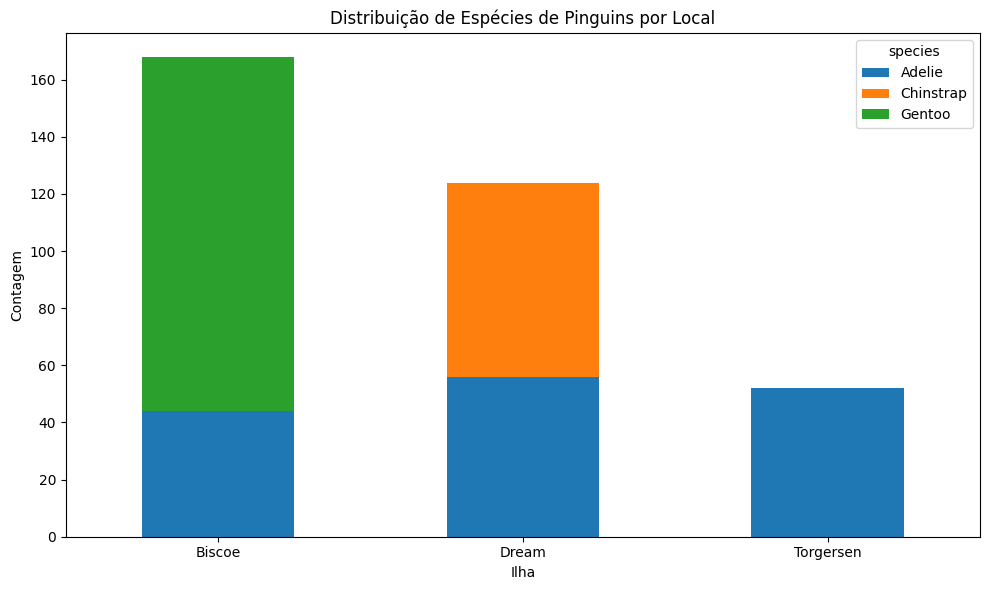

In [12]:
# Agrupar dados por espécie e ilha, contando o número de ocorrências
species_island_counts = df.groupby(['island', 'species']).size().unstack().fillna(0)

# Plotar o gráfico de barras empilhadas
species_island_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Ilha')
plt.ylabel('Contagem')
plt.title('Distribuição de Espécies de Pinguins por Local')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



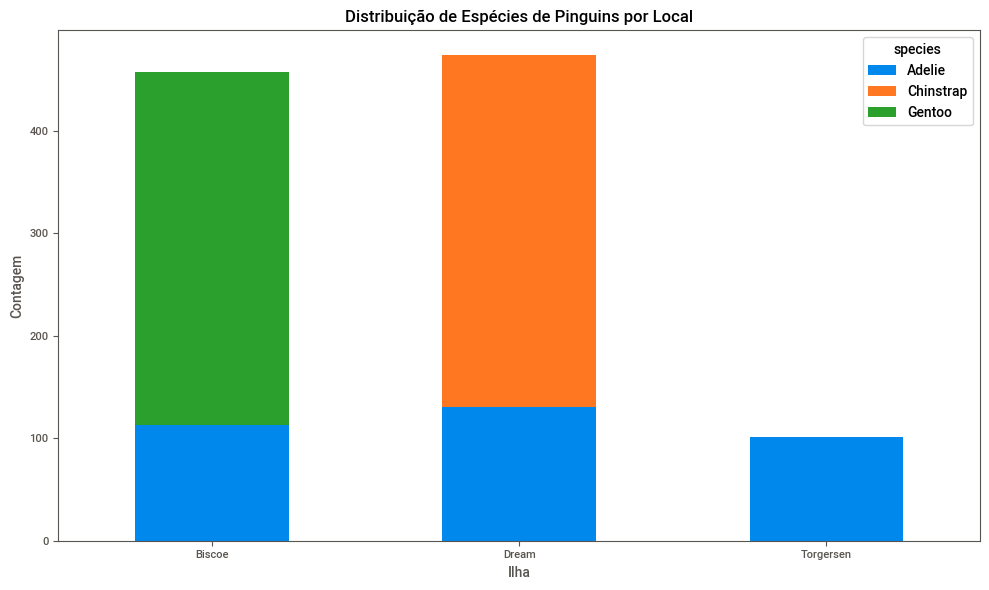

In [26]:
# Agrupar dados por espécie e ilha, contando o número de ocorrências ->> Dados  balanceados
species_island_counts = balanced_df.groupby(['island', 'species']).size().unstack().fillna(0)

# Plotar o gráfico de barras empilhadas
species_island_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Ilha')
plt.ylabel('Contagem')
plt.title('Distribuição de Espécies de Pinguins por Local')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-29-e54101b7edd3>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



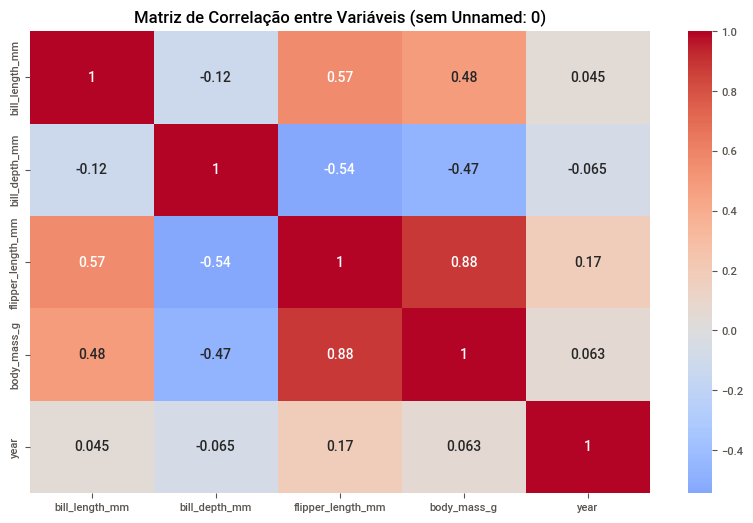

In [29]:
# Remover a coluna "Unnamed: 0"
balanced_df = balanced_df.drop(columns=['Unnamed: 0'])

# Calculando a matriz de correlação
correlation_matrix = balanced_df.corr()

# Plotando o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Variáveis (sem Unnamed: 0)')
plt.show()


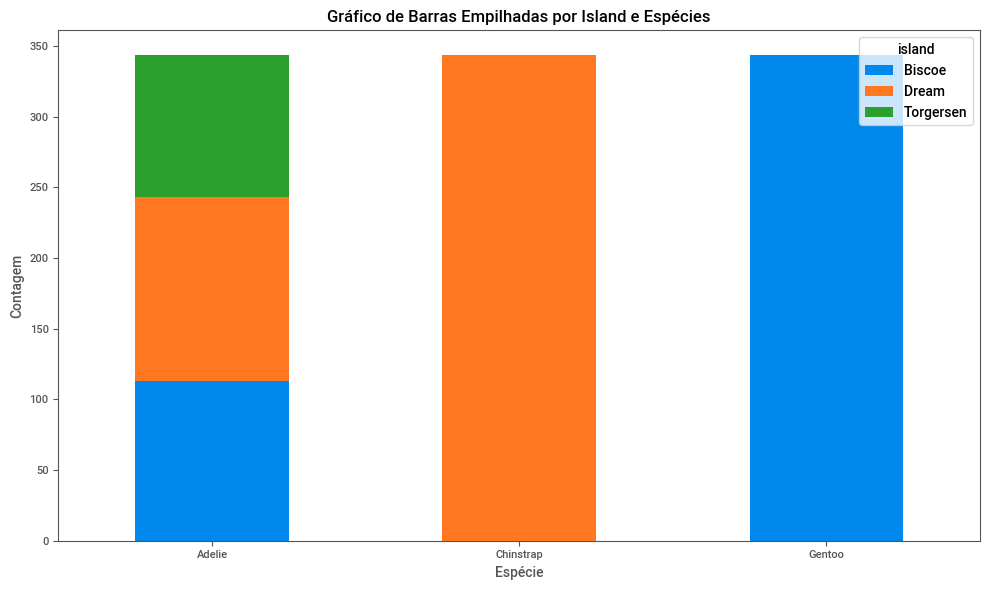

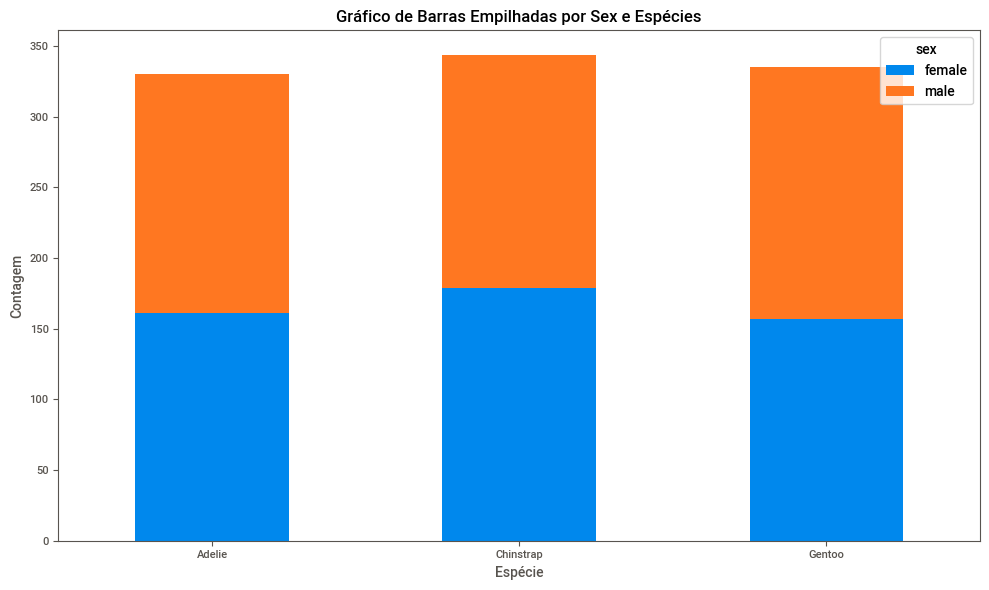

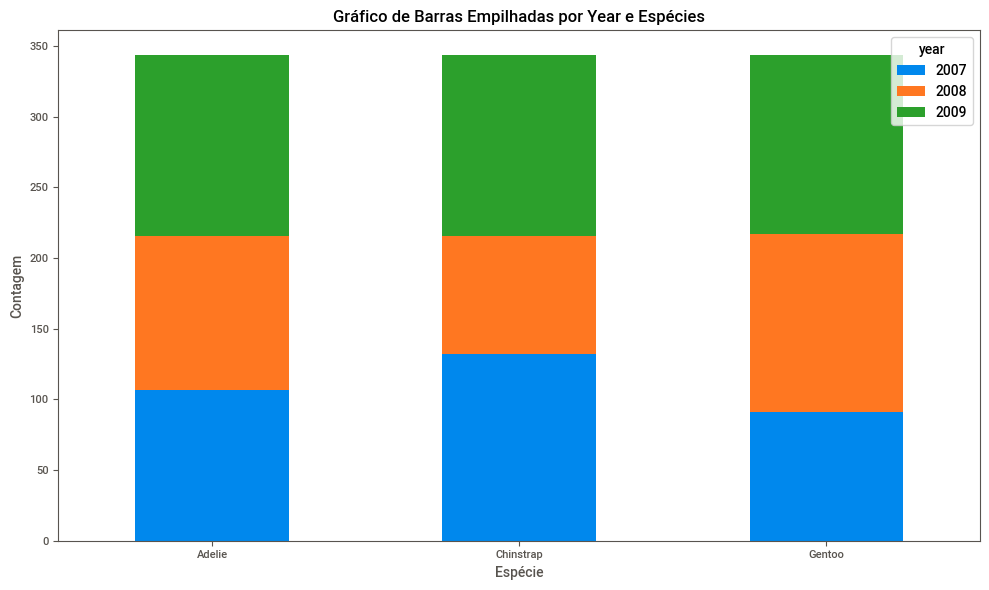

In [31]:
# Variáveis a serem relacionadas
variables_to_compare = ['island', 'sex', 'year']

# Loop através das variáveis para criar gráficos de barras empilhadas
for variable in variables_to_compare:
    stacked_data = balanced_df.groupby(['species', variable]).size().unstack().fillna(0)
    stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.xlabel('Espécie')
    plt.ylabel('Contagem')
    plt.title(f'Gráfico de Barras Empilhadas por {variable.capitalize()} e Espécies')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [35]:

# Remover a coluna "Unnamed: 0" se estiver presente
if 'Unnamed: 0' in balanced_df.columns:
    balanced_df = balanced_df.drop(columns=['Unnamed: 0'])

# Criando o relatório com o Sweetviz
report = sv.analyze(balanced_df)

# Mostrando o relatório no navegador
report.show_html('penguins_report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report penguins_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [38]:
from pandas_profiling import ProfileReport
import pandas as pd

# Assuming you have a DataFrame named 'data'
report = ProfileReport(balanced_df)

O relatório de análise estatística descritiva que você forneceu contém informações valiosas sobre o conjunto de dados. Aqui está um resumo das principais informações apresentadas no relatório:

Overview

O relatório apresenta algumas informações gerais sobre o conjunto de dados, incluindo o número de variáveis (8) e o número de observações (1032).
O relatório também destaca algumas estatísticas sobre valores ausentes, duplicatas e o tamanho total do conjunto de dados em memória.
Variáveis

O relatório fornece informações detalhadas sobre cada variável no conjunto de dados.
Cada variável é categorizada como "Categorical" ou "Numeric", dependendo do tipo de dados que ela contém.
Categorical Variables

Existem várias variáveis categóricas no conjunto de dados, incluindo 'species', 'island', 'sex' e 'year'.
Cada variável categórica possui uma contagem de valores distintos, informações sobre valores ausentes e o tamanho em memória.
Numeric Variables

Existem quatro variáveis numéricas: 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm' e 'body_mass_g'.
Cada variável numérica possui informações estatísticas, incluindo valores distintos, valores ausentes, valores infinitos (se houver), média, mínimo, máximo e outras métricas.
Interactions

Esta seção destaca as interações entre variáveis, como a correlação entre diferentes variáveis.
Missing values

O relatório apresenta informações sobre valores ausentes no conjunto de dados, mostrando quantos valores estão ausentes em cada variável.
Duplicate rows

Esta seção identifica as linhas duplicadas no conjunto de dados, mostrando as observações que ocorrem com mais frequência e quantas duplicatas elas têm.
Sample

Mostra exemplos das primeiras e últimas linhas do conjunto de dados.
Este relatório fornece uma visão geral detalhada das estatísticas descritivas do conjunto de dados, incluindo distribuições, estatísticas resumidas, valores ausentes e duplicatas. Essas informações são fundamentais para entender a qualidade dos dados e guiar análises mais aprofundadas ou preparação dos dados para modelagem.

In [41]:
# Remover a coluna "Unnamed: 0" se estiver presente
if 'Unnamed: 0' in balanced_df.columns:
    balanced_df = balanced_df.drop(columns=['Unnamed: 0'])

# Criando o relatório com o pandas-profiling
report = ProfileReport(balanced_df)

# Salvando o relatório em um arquivo HTML
report.to_file("penguins_profiling_report.html")

# Abrindo o relatório no navegador
webbrowser.open("penguins_profiling_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/multimethod/__init__.py:315: FutureWarning:

reindexing with a non-unique Index is deprecated and will raise in a future version.

/usr/local/lib/python3.10/dist-packages/pandas_profiling/model/correlations.py:67: UserWarning:

There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'cannot reindex on an axis with duplicate labels')



Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

False